## Styling

Bottlenose dolphins are [incredible creatures](https://en.wikipedia.org/wiki/Bottlenose_dolphin#:~:text=.%5B41%5D-,Physiology,-and%20senses%5B).

This example uses data from a fascinating study by [Lusseau et al, 2003](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.174.3721&rep=rep1&type=pdf). Between 1995 and 2001, a group of dolphins were observed in the beautiful Doubtful Sound, New Zealand. As schools of dolphins were encountered in the fjord, each member was photographed and subsequently identified through their natural markings. This made it possible to determine how often a pair of individuals is likely to be seen together. Lusseau defined social acquaintances in the network as preferred companionships, that is individuals that were seen together more often than expected by chance. He then built a social network with 62 dolphins and 159 undirected ties representing preferred companionships. In the dolphin network, the sex of dolphins was known for all but four individuals from direct observations of genitalia using an underwater camera. 

The example shows
- how to lay out a moderately sized association network
- further examples of tweaking appearance attributes (colour, size, labels etc)

In [2]:
import sys
import altair as alt
import networkx as nx

".." not in sys.path and sys.path.append("..")
from alph import alph, layout, util

util.set_altair_renderer()

Source:  
http://www-personal.umich.edu/~mejn/netdata/

https://rpubs.com/pspace/quickR

https://www.kaggle.com/datasets/mashazhil/social-network-of-dolphins-in-new-zealand

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.174.3721&rep=rep1&type=pdf

https://users.dimi.uniud.it/~massimo.franceschet/bottlenose/bottlenose.html

In [3]:
G = nx.read_gml("data/dolphins.gml", label="id")
nx.set_node_attributes(G, nx.degree_centrality(G), "degree_centrality")
nx.set_node_attributes(G, nx.betweenness_centrality(G), "betweenness_centrality")

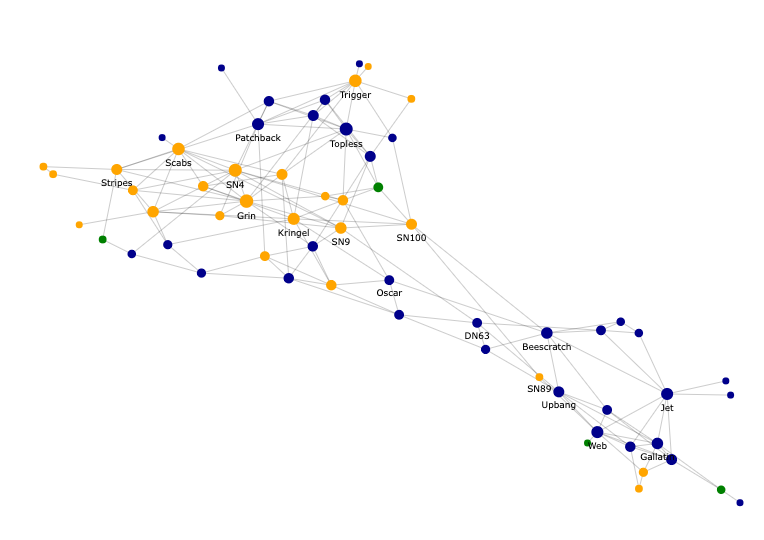

In [60]:
alph(
    G,
    layout_fn=lambda g: 
        layout.force_atlas(g, strongGravityMode=False, gravity=2, seed=123
    ),
    node_args=dict(
        size=alt.Size(
            "degree_centrality", scale=alt.Scale(domain=[0,0.5], range=[6**2, 20**2]), legend=None
        ),
        fill=alt.Color(
            "sex", scale=alt.Scale(domain=["M", "F", "U"], range=["darkblue", "orange", "green"]), legend=None
        ),
        tooltip_attrs=["label", "sex"],
        label_attr=alt.condition(
            (alt.datum.degree_centrality > 0.14) | (alt.datum.betweenness_centrality > 0.05),
            "label",
            alt.value("")
        ),
        label_offset=8,
        label_size=9,
    ),
    edge_args=dict(
        color="black",
        opacity=0.4,
        strokeWidth=alt.value(0.5),
    ),
).configure_view(
    stroke="transparent"
).configure_text(
    font="Verdana, Sans"
).properties(
    width=720, height=500, padding=20
)